<a href="https://colab.research.google.com/github/furkan09-official/Machine-Learning/blob/main/GredientDesc.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [4]:
from sklearn.model_selection import train_test_split
from sklearn.datasets import make_regression
from sklearn.linear_model import LinearRegression

In [7]:
x , y = make_regression(n_samples = 100, n_features = 1, noise = 10)
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size = 0.2)
x_train.shape
y_train.shape


(80,)

In [11]:
reg = LinearRegression()
reg.fit(x_train, y_train)
reg.coef_
reg.intercept_

0.6604311421894646

In [14]:
y_pred = reg.predict(x_test)
print(y_pred)

[ -27.24466191  -57.67165068   28.63598702 -111.79684449  -66.04157487
   38.8317311   -66.6760275    39.33475587  -37.65140603   83.20101775
 -147.09597478  138.08074659  -96.52188084    8.96016706   63.47462546
   29.26569325  -41.1807043   -56.50155715 -124.6865655   -39.84696595]


In [23]:
y_pred_ = (70 * x_test) + 0
print(y_pred_)

[[ -27.97205164]
 [ -58.47205032]
 [  28.04268354]
 [-112.72711815]
 [ -66.86205824]
 [  38.26289243]
 [ -67.49803325]
 [  38.76712421]
 [ -38.40376686]
 [  82.7386437 ]
 [-148.11094912]
 [ 137.75005707]
 [ -97.41550206]
 [   8.31965123]
 [  62.9649177 ]
 [  28.67390076]
 [ -41.94153373]
 [ -57.29914914]
 [-125.6477682 ]
 [ -40.60459505]]


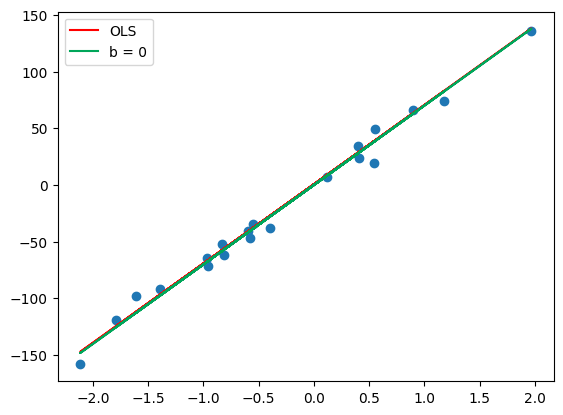

In [25]:
plt.scatter(x_test , y_test)
plt.plot(x_test , y_pred , color = 'red' , label = 'OLS')
plt.plot(x_test , y_pred_ , color = '#00a65a' , label = 'b = 0')
plt.legend()
plt.show()


In [27]:
m = 70
b =0
loss_slope = -2 * np.sum(y_test - m * x_test - b)
print(loss_slope)

246.72217343362945


In [28]:
#lets take learning rate = 0.1
lr = 0.1
step_size = lr * loss_slope
print(step_size)

24.672217343362945


In [29]:
#calculating the new b
b_new = b -step_size
print(b_new)

-24.672217343362945


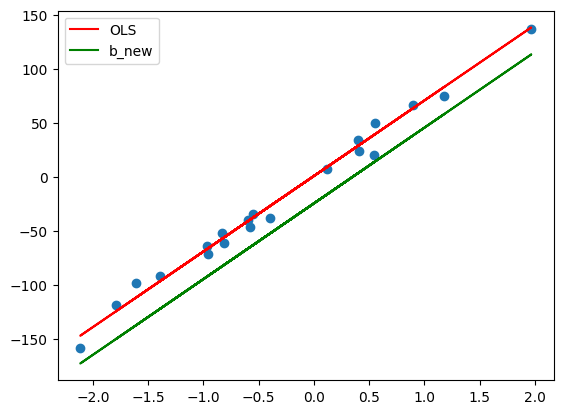

In [32]:
y_pred2 = (m* x_test) + b_new
plt.scatter(x_test , y_test)
plt.plot(x_test , y_pred , color = 'red' , label ='OLS')
plt.plot(x_test , y_pred2 , color = 'green' , label = 'b_new')
plt.legend()
plt.show()

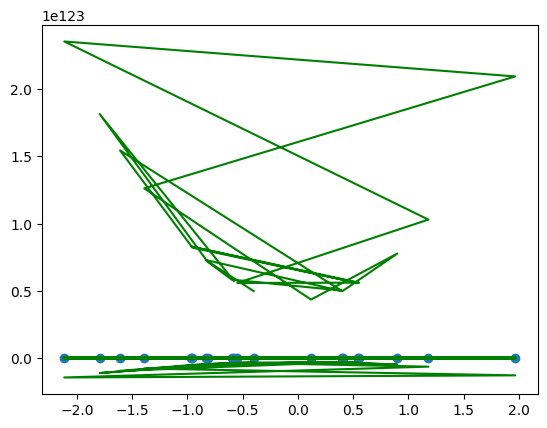

In [62]:
b = 0
m = 1
lr = 0.01
epochs = 100
for i in range(epochs):
  loss_slope_b= -2 * np.sum((y_test - m * x_test) -b)
  loss_slope_m= -2 * np.sum((y_test - m * x_test) -b)*x_test

  step_size_b = lr * loss_slope_b
  step_size_m = lr * loss_slope_m

  b = b - step_size_b
  m = m - step_size_m
  y_pred3 = (m * x_test) + b
  plt.plot(x_test , y_pred3 , color = 'green')
plt.scatter(x_test , y_test)
plt.show()

In [64]:
from sklearn.metrics import r2_score
r2_score(y_test , y_pred3)

-2.342060521902984e+242